<h1>Dataset Regresión Logística – Heart Disease Cleveland UCI</h1>

In [7]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
# lectura de datos en Python y lo cargamos en la variable Datos

archivo = pd.read_csv('./heart_cleveland_upload.csv')

In [9]:
# Realizamos lectura de los Datos para el análisis exploratorio

archivo.head(10)

,edad,genero,tipo_dolor_pecho,precion_arterial,colesterol,glusemia,resultados_electrocardiograficos,frecuencia_cardiaca,angina,depresion,ejercicio_pico,no_vasos,talasemia,condicion
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [11]:
# Descripción de los datos
archivo.describe()

,edad,genero,tipo_dolor_pecho,precion_arterial,colesterol,glusemia,resultados_electrocardiograficos,frecuencia_cardiaca,angina,depresion,ejercicio_pico,no_vasos,talasemia,condicion
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos de la presion arterial')

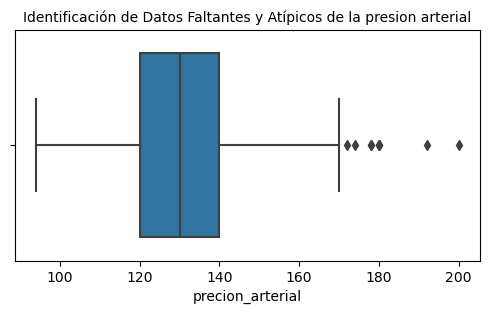

In [13]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=archivo['precion_arterial'])
plt.title('Identificación de Datos Faltantes y Atípicos de la presion arterial en pacientes', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos de la presion arterial')

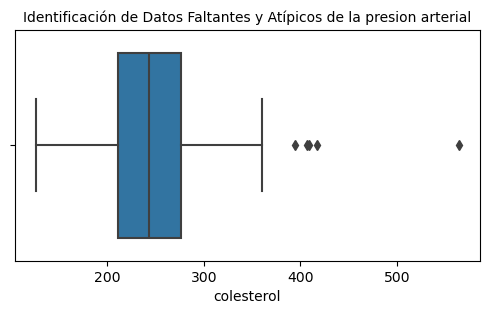

In [14]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=archivo['colesterol'])
plt.title('Identificación de Datos Faltantes y Atípicos del colesterol en pacientes', fontsize=10 )

In [ ]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=archivo['frecuencia_cardiaca'])
plt.title('Identificación de Datos Faltantes y Atípicos de la frecuencia cardiaca', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos de depresion')

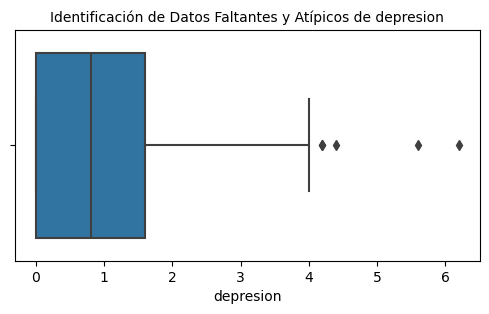

In [16]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=archivo['depresion'])
plt.title('Identificación de Datos Faltantes y Atípicos de depresion', fontsize=10 )

<h1>2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario</h1>

In [19]:
# Realizamos lectura de los Datos para el análisis exploratorio

archivo.head(10)

,edad,genero,tipo_dolor_pecho,precion_arterial,colesterol,glusemia,resultados_electrocardiograficos,frecuencia_cardiaca,angina,depresion,ejercicio_pico,no_vasos,talasemia,condicion
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [26]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en precion arterial: ",archivo['precion_arterial'].isin([0]).sum())
print("Cantidad de Registros con cero en colesterol: ",archivo['colesterol'].isin([0]).sum())
print("Cantidad de Registros con cero en  frecuencia cardiaca: ",archivo['frecuencia_cardiaca'].isin([0]).sum())
print("Cantidad de Registros con cero en depresion: ",archivo['depresion'].isin([0]).sum())
print("Cantidad de Registros con cero en la edad: ",archivo['edad'].isin([0]).sum())

Cantidad de Registros con cero en precion arterial:  0
Cantidad de Registros con cero en colesterol:  0
Cantidad de Registros con cero en  frecuencia cardiaca:  0
Cantidad de Registros con cero en depresion:  0
Cantidad de Registros con cero en la edad:  0


In [24]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

archivo['depresion']=archivo['depresion'].replace(0,archivo['depresion'].mean())

In [27]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en depresion: ",archivo['depresion'].isin([0]).sum())



Cantidad de Registros con cero en depresion:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

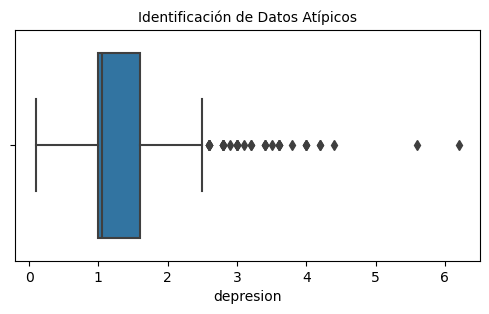

In [28]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=archivo['depresion'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [31]:
#Conteo de Datos Atípicos

nivel_minimo=0.8
nivel_maximo=2.0
Total_Atipicos=((archivo['depresion']<nivel_minimo)|(archivo['depresion']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 99


In [33]:
# Filtra Datos Atípicos

archivo=archivo[(archivo['depresion']<nivel_maximo)&(archivo['depresion']>nivel_minimo)]

In [34]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((archivo['depresion']<nivel_minimo)|(archivo['depresion']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [36]:
#Revisión del tipo de datos y datos faltantes

archivo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 1 to 296
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   edad                              176 non-null    int64  
 1   genero                            176 non-null    int64  
 2   tipo_dolor_pecho                  176 non-null    int64  
 3   precion_arterial                  176 non-null    int64  
 4   colesterol                        176 non-null    int64  
 5   glusemia                          176 non-null    int64  
 6   resultados_electrocardiograficos  176 non-null    int64  
 7   frecuencia_cardiaca               176 non-null    int64  
 8   angina                            176 non-null    int64  
 9   depresion                         176 non-null    float64
 10  ejercicio_pico                    176 non-null    int64  
 11  no_vasos                          176 non-null    int64  
 12  talasemia    

<h1>3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características</h1>
<p>Característica de interes:
Condicionco: si la persona tienposible enfermedad en el corazones o no (0 indica que el paciente no tiene enfermedad cardíacaes - 1 indica que el paciente Si tiene enfermedad cardíacaes)
Prede si el paciente tiene o no enfermedad cardíaca (condición).tes</p>

In [37]:
# Total de personas con Diabetes

archivo['condicion'].value_counts()

condicion
0    107
1     69
Name: count, dtype: int64

In [40]:
archivo[['condicion']].head(40)

,condicion
1,0
3,1
4,0
8,0
11,1
13,0
14,0
15,0
16,0
17,0


<h1>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
</h1>

In [42]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = archivo.drop('condicion',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = archivo['condicion'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [43]:
print (X_train)

     edad  genero  tipo_dolor_pecho  precion_arterial  colesterol  glusemia  \
187    62       1                 3               120         267         0   
50     49       0                 1               134         271         0   
262    51       1                 3               140         299         0   
76     68       1                 2               180         274         1   
37     56       0                 1               140         294         0   
..    ...     ...               ...               ...         ...       ...   
215    58       0                 3               100         248         0   
208    59       1                 3               110         239         0   
33     57       0                 1               130         236         0   
155    77       1                 3               125         304         0   
277    45       1                 3               142         309         0   

     resultados_electrocardiograficos  frecuencia_c

In [44]:
print (Y_train)

187    1
50     0
262    1
76     1
37     0
      ..
215    0
208    1
33     1
155    1
277    1
Name: condicion, Length: 132, dtype: int64


<h1>5. Entrenar el modelo configurando los diferentes hiperparámetros
</h1>

In [45]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [46]:
print (Y_test)

265    0
82     0
54     0
43     0
52     1
270    1
212    0
181    1
3      1
66     0
278    0
22     0
110    0
67     0
203    1
69     0
78     0
146    0
121    0
247    1
154    0
26     1
29     0
294    1
151    0
18     1
44     0
170    1
125    0
254    0
269    1
195    1
163    1
81     0
135    0
118    0
204    1
226    1
132    0
285    0
150    0
225    1
191    0
240    1
Name: condicion, dtype: int64


In [47]:
print (Prediccion)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1
 1 0 0 0 1 0 1]


<h1>6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc</h1>

In [48]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.86      0.71      0.77        17

    accuracy                           0.84        44
   macro avg       0.85      0.82      0.83        44
weighted avg       0.84      0.84      0.84        44



<h1>7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo</h1>

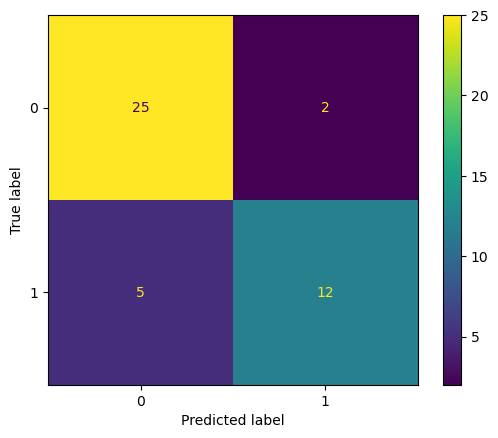

In [49]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

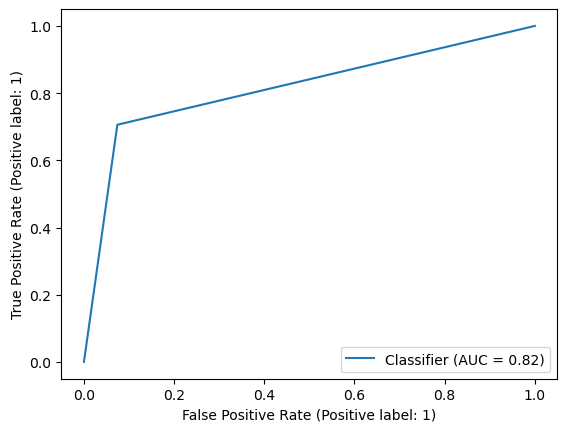

In [50]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

<h1>8. Interpretar, analizar y documentar los resultados obtenidos
</h1>

<p>Del desempeño del modelo se puede describir:

Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clasecondicionco" es 8670, lo que significa que e8670% de los predichocon enfermedades cardiacas s por el modelo eran en realidacontenían ya un problema en el corazónos.

Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clacondiciontico" e710,57, lo que indica que el modelo identificó correctamente71l 57% de todos que contenían enfermedades en el corazónicos.

F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la ccondicionbética"77s 0,61, lo que indica un equilibrio entre precisión y recuerdo.

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente c25 falso 109

Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente com12Verdadero 36

Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente co2 Verdaderas 15

Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectam5te como falso 31

De la curva de precisión del modelo se puede interpre82r:

El AUC es 0,69 lo q82 significa que el 69 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.</p>